In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Wstępna analiza danych, sprawdzenie poprawnosci danych, kolumn, kategorii

In [103]:
df = pd.read_csv("train.csv")
print(df.head())

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

In [104]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [105]:
print(df['price_range'].value_counts())

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


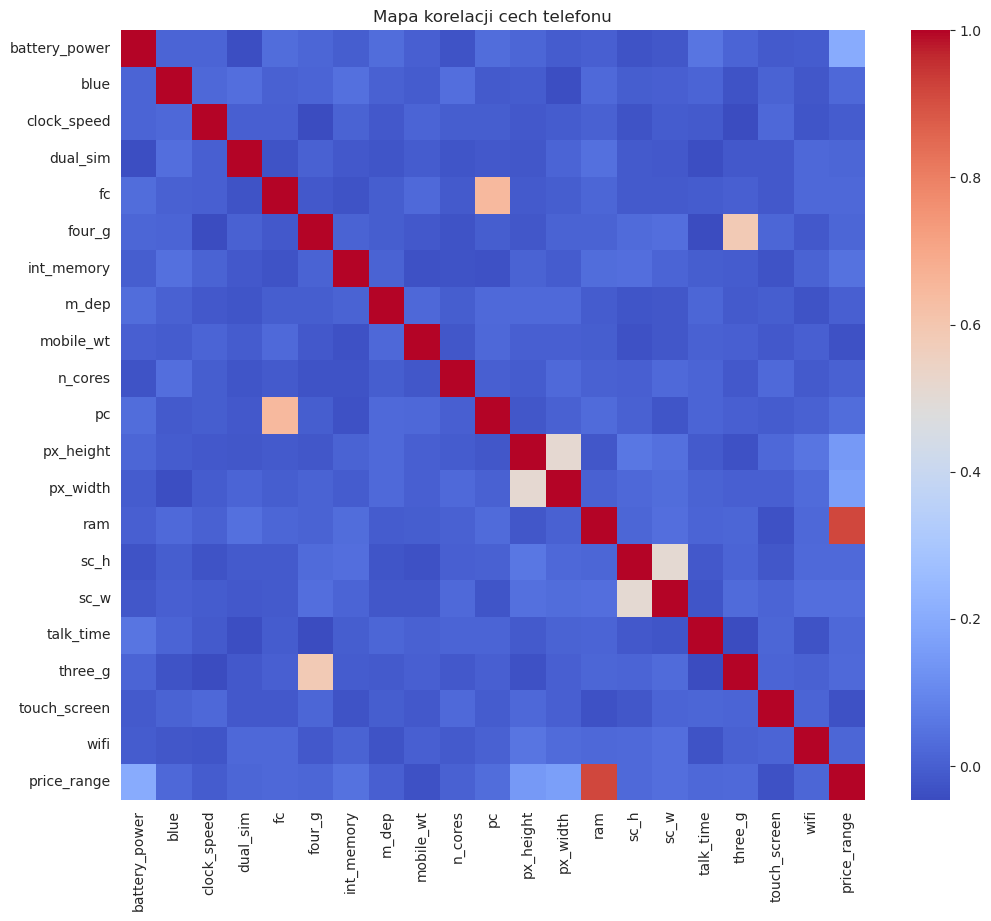

In [106]:
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Mapa korelacji cech telefonu")
plt.show()

In [107]:
print(corr['price_range'].sort_values(ascending=False))

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64


Przygotowanie danych

In [108]:
X = df.drop("price_range", axis=1)
y = df["price_range"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Drzewo decyzyjne
Dokladnosci (w %) dla glebokosci;
1 = 54.25,
2 = 75,
3 = 74,
4 = 79.5,
5 = 80,
6 = 80.5,
7 = 83.5,
8 = 82.75,
9 = 82.5,
10 = 83.25,
11 = 82,
12 = 81.75,
13 = 83,
14 oraz powyzej = 82.5.





In [109]:
drzewo_model = DecisionTreeClassifier(max_depth=5, random_state=42)
drzewo_model.fit(X_train, y_train)
y_pred_drzewo = drzewo_model.predict(X_test)
dokladnosc_drzewo = accuracy_score(y_test, y_pred_drzewo)
print(f"Dokładność Drzewa Decyzyjnego: {dokladnosc_drzewo*100:.2f}%")

Dokładność Drzewa Decyzyjnego: 80.00%


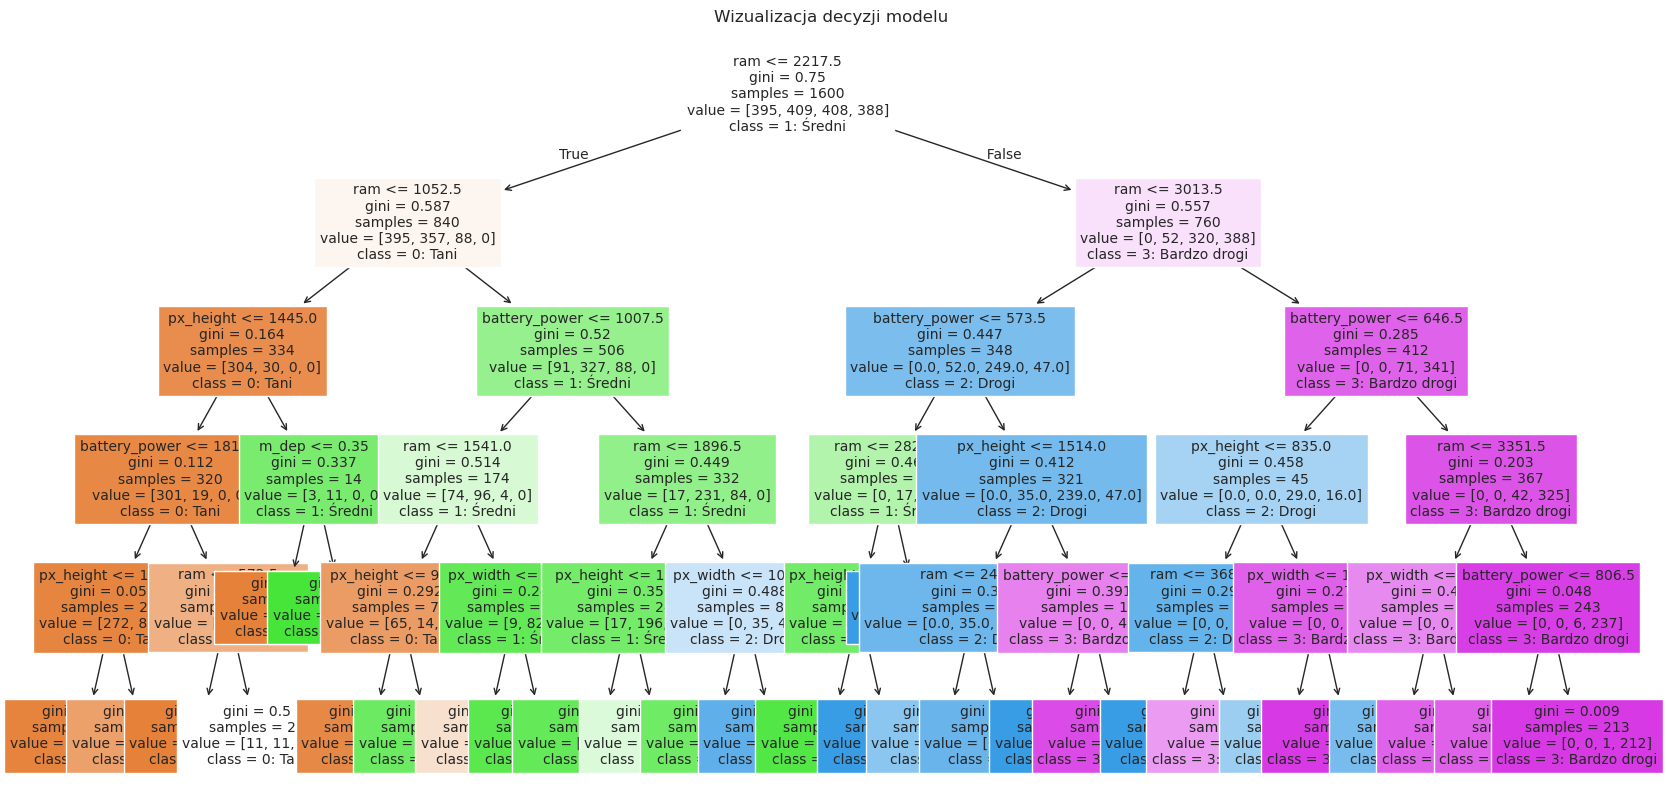

In [110]:
plt.figure(figsize=(20, 10))
plot_tree(drzewo_model,
          feature_names=X.columns,  # Nazwy kolumn (np. ram, battery_power)
          class_names=['0: Tani', '1: Średni', '2: Drogi', '3: Bardzo drogi'], # Nazwy klas
          filled=True, # Kolory ułatwiają czytanie
          fontsize=10)
plt.title("Wizualizacja decyzji modelu")
plt.show()

Las losowy, dla n = 100, dokladnosc = 89.25%

In [111]:
las_model = RandomForestClassifier(n_estimators=100, random_state=42)
las_model.fit(X_train, y_train)
y_pred_las = las_model.predict(X_test)
dokladnosc_las = accuracy_score(y_test, y_pred_las)
print(f"Dokladnosc lasu losowego: {dokladnosc_las*100:.2f}%")

Dokladnosc lasu losowego: 89.25%


/tmp/ipykernel_10815/3477076360.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Waznosc', y='Cecha', data=df_cechy, palette='viridis')


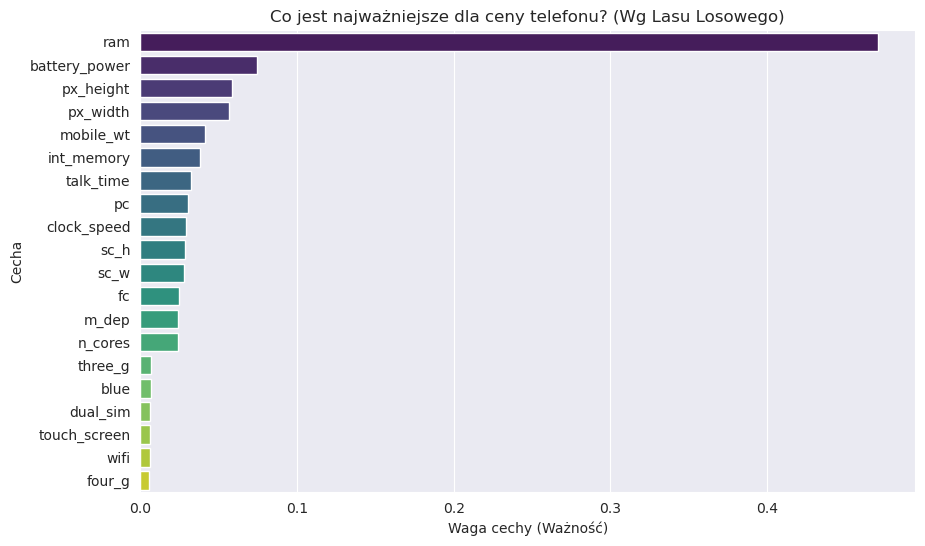

In [112]:
waznosc = las_model.feature_importances_
cechy = X.columns
df_cechy = pd.DataFrame({"Cecha": cechy, "Waznosc": waznosc})
df_cechy = df_cechy.sort_values("Waznosc", ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Waznosc', y='Cecha', data=df_cechy, palette='viridis', hue='Cecha')
plt.title("Co jest najważniejsze dla ceny telefonu? (las losowy)")
plt.xlabel("Waga cechy (Ważność)")
plt.show()

Model drzewa deycyzjnego dla n=3 (tylko do wizualizacji!)

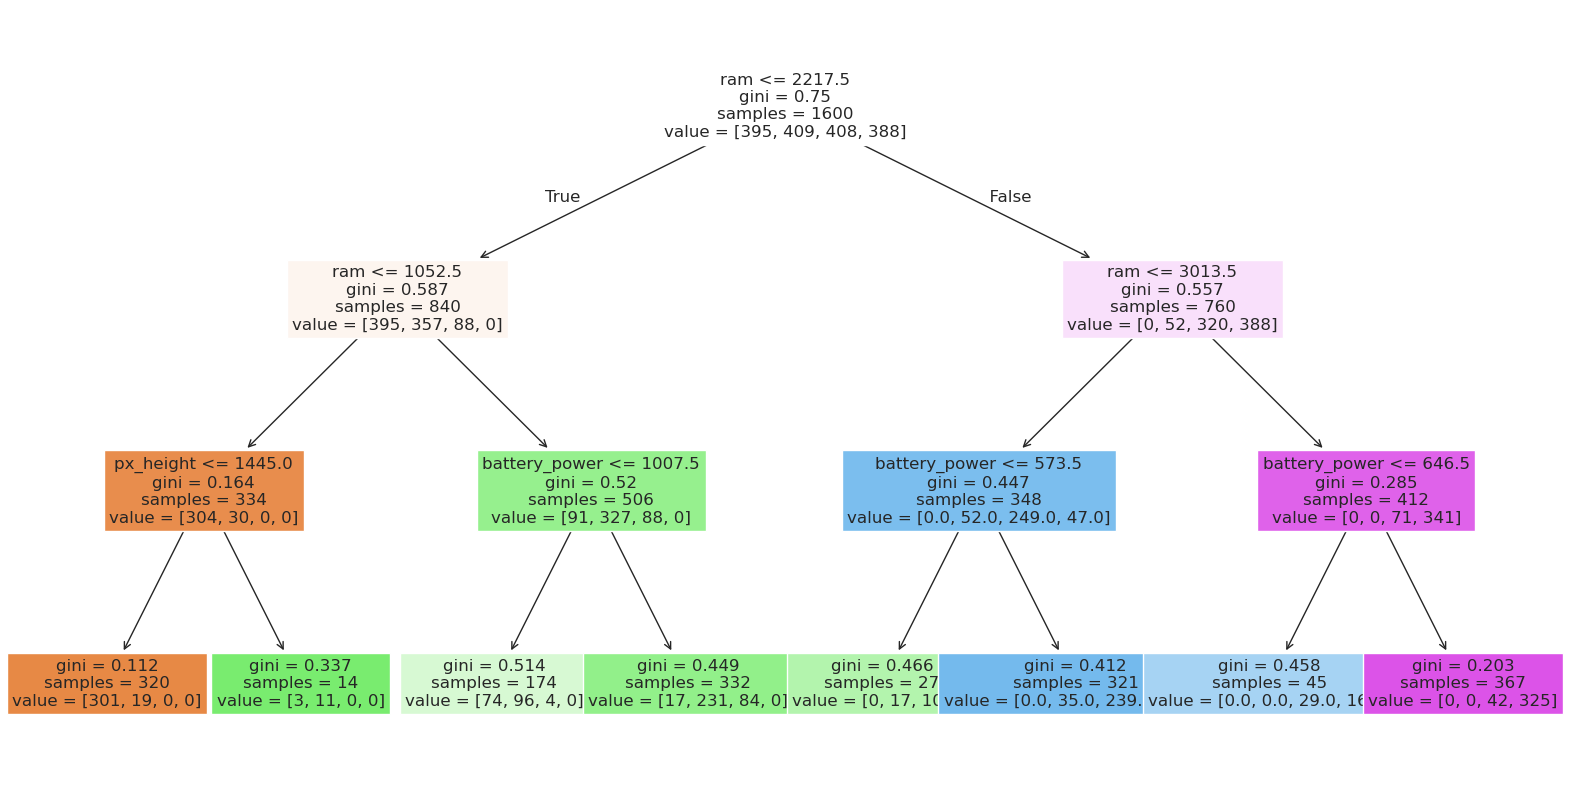

In [113]:
model_do_zdjecia = DecisionTreeClassifier(max_depth=3, random_state=42)
model_do_zdjecia.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(model_do_zdjecia, feature_names=X.columns, filled=True, fontsize=12)
plt.savefig('drzewo_uproszczone.png', dpi=300)